#THE SPARKS FOUNDATION - DATA SCIENCE (GRIP FEBRUARY 2022)

##TASK2 - PREDICTION USING UNSUPERVISED MACHINE LEARNING

##K- Means Clustering


#Author: Archana Pandita

#Importing Libraries

In [ ]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array
import matplotlib.pyplot as plt  
from sklearn import datasets

#Load the iris dataset


In [ ]:
iris = datasets.load_iris() 

#Read Dataset And View

In [ ]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


#Summarize Dataset

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
print(iris_df.shape)
iris_df=pd.DataFrame(iris_df)
iris_df.head(5)

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
print(iris_df["sepal length (cm)"].nunique())
iris_df["sepal length (cm)"].unique()

35


array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [ ]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

##K-Means clustering is centroid-based clustering algorithm. Such algorithms are efficient but sensitive to initial conditions and outliers.

#Finding the Optimized K Value using
##The Elbow method are used to decide on the optimum number of clusters(k) to perform the K-Means clustering.

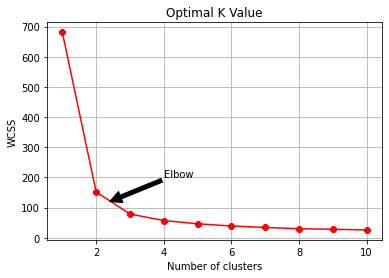

In [ ]:
# Finding the optimum number of clusters for k-means classification
# Plotting the results onto a line graph,allowing us to observe 'The elbow'
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  km=KMeans(n_clusters=i, random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)
plt.plot (range(1,11) ,wcss, color="red", marker ="8")
plt.title('Optimal K Value')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")# Within cluster sum of squares
plt.annotate("Elbow",xytext= (4,200), xy= (2.4,120) , arrowprops=dict(facecolor = 'black'))
plt.grid()
plt.show()

#Fitting the k-means to the dataset with k=3

In [ ]:
km=KMeans(n_clusters=3, random_state=0)
y_means = km.fit_predict(x)

#Visualizing the clusters for k=3

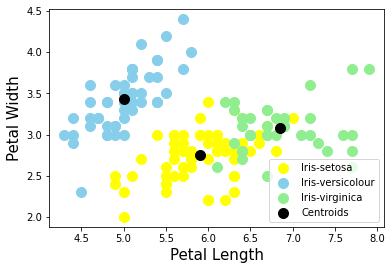

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1],s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1],s = 100, c = 'skyblue', label = 'Iris-versicolour')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1],s = 100, c = 'lightgreen', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Petal Length',size=15)
plt.ylabel('Petal Width',size=15)
plt.legend()

##Therefore,we have predicted the optimum number of clusters.